## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
import tensorflow as tf
import seaborn as sns


## Downloading Data

In [ ]:
!wget --header="Host: doc-0c-4k-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_mm5pe75pf4mhpbdikb2k80b74s62g311_nonce=30hiuvs6pco5o" --header="Connection: keep-alive" "https://doc-0c-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/3ucl3j3fnf44vseamor1sc9k2f2eie6n/1643789475000/08255761277798433337/08255761277798433337/1_exO0JIa-E6JAwyMUAvtb1qQqYD9BUUm?e=download&authuser=0&nonce=30hiuvs6pco5o&user=08255761277798433337&hash=djri7fsslgmgjql808612d65cnlmq2ri" -c -O 'dog-breed-identification.zip'

--2022-02-02 08:12:31--  https://doc-0c-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/3ucl3j3fnf44vseamor1sc9k2f2eie6n/1643789475000/08255761277798433337/08255761277798433337/1_exO0JIa-E6JAwyMUAvtb1qQqYD9BUUm?e=download&authuser=0&nonce=30hiuvs6pco5o&user=08255761277798433337&hash=djri7fsslgmgjql808612d65cnlmq2ri
Resolving doc-0c-4k-docs.googleusercontent.com (doc-0c-4k-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-0c-4k-docs.googleusercontent.com (doc-0c-4k-docs.googleusercontent.com)|74.125.23.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 724495926 (691M) [application/zip]
Saving to: ‘dog-breed-identification.zip’

dog-breed-identific 100%[===================>] 690.93M  67.4MB/s    in 11s     

2022-02-02 08:12:42 (62.8 MB/s) - ‘dog-breed-identification.zip’ saved [724495926/724495926]



In [ ]:
!unzip dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

## Reading CSV Files

In [ ]:
train_files = pd.read_csv('labels.csv')
train_files.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
train_files['path'] = 'train/' + train_files['id'] + '.jpg'
train_files.head()


,id,breed,path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,train/0021f9ceb3235effd7fcde7f7538ed62.jpg


In [ ]:
train_files.head()

,id,breed,path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,train/0021f9ceb3235effd7fcde7f7538ed62.jpg


## EDA

### Label distribution barplot

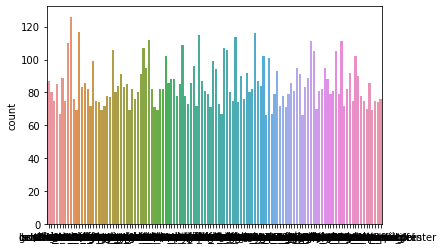

In [ ]:
sns.countplot(x = train_files['breed'].values)

In [ ]:
# unique_labels, label_counts = np.unique(train_labels, return_counts=True)
labels_temp_dataframe = pd.DataFrame({'labels': train_files['breed'].values})

labels_temp_dataframe.value_counts()

labels              
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Length: 120, dtype: int64

1. Scottish deerhound is the breed that occurs most frequently.
2. There are few imbalances that need to be handled.
3. There are no outliers

### Image width-height distribution

In [ ]:
import cv2
from tqdm import tqdm
train_image_heights = []
train_image_widths = []
  
for filepath in tqdm(train_files['path'].values):
  image = cv2.imread(filepath)
  height, width = image.shape[:2]
  train_image_heights.append(height)
  train_image_widths.append(width)
  


100%|██████████| 10222/10222 [00:24<00:00, 419.68it/s]


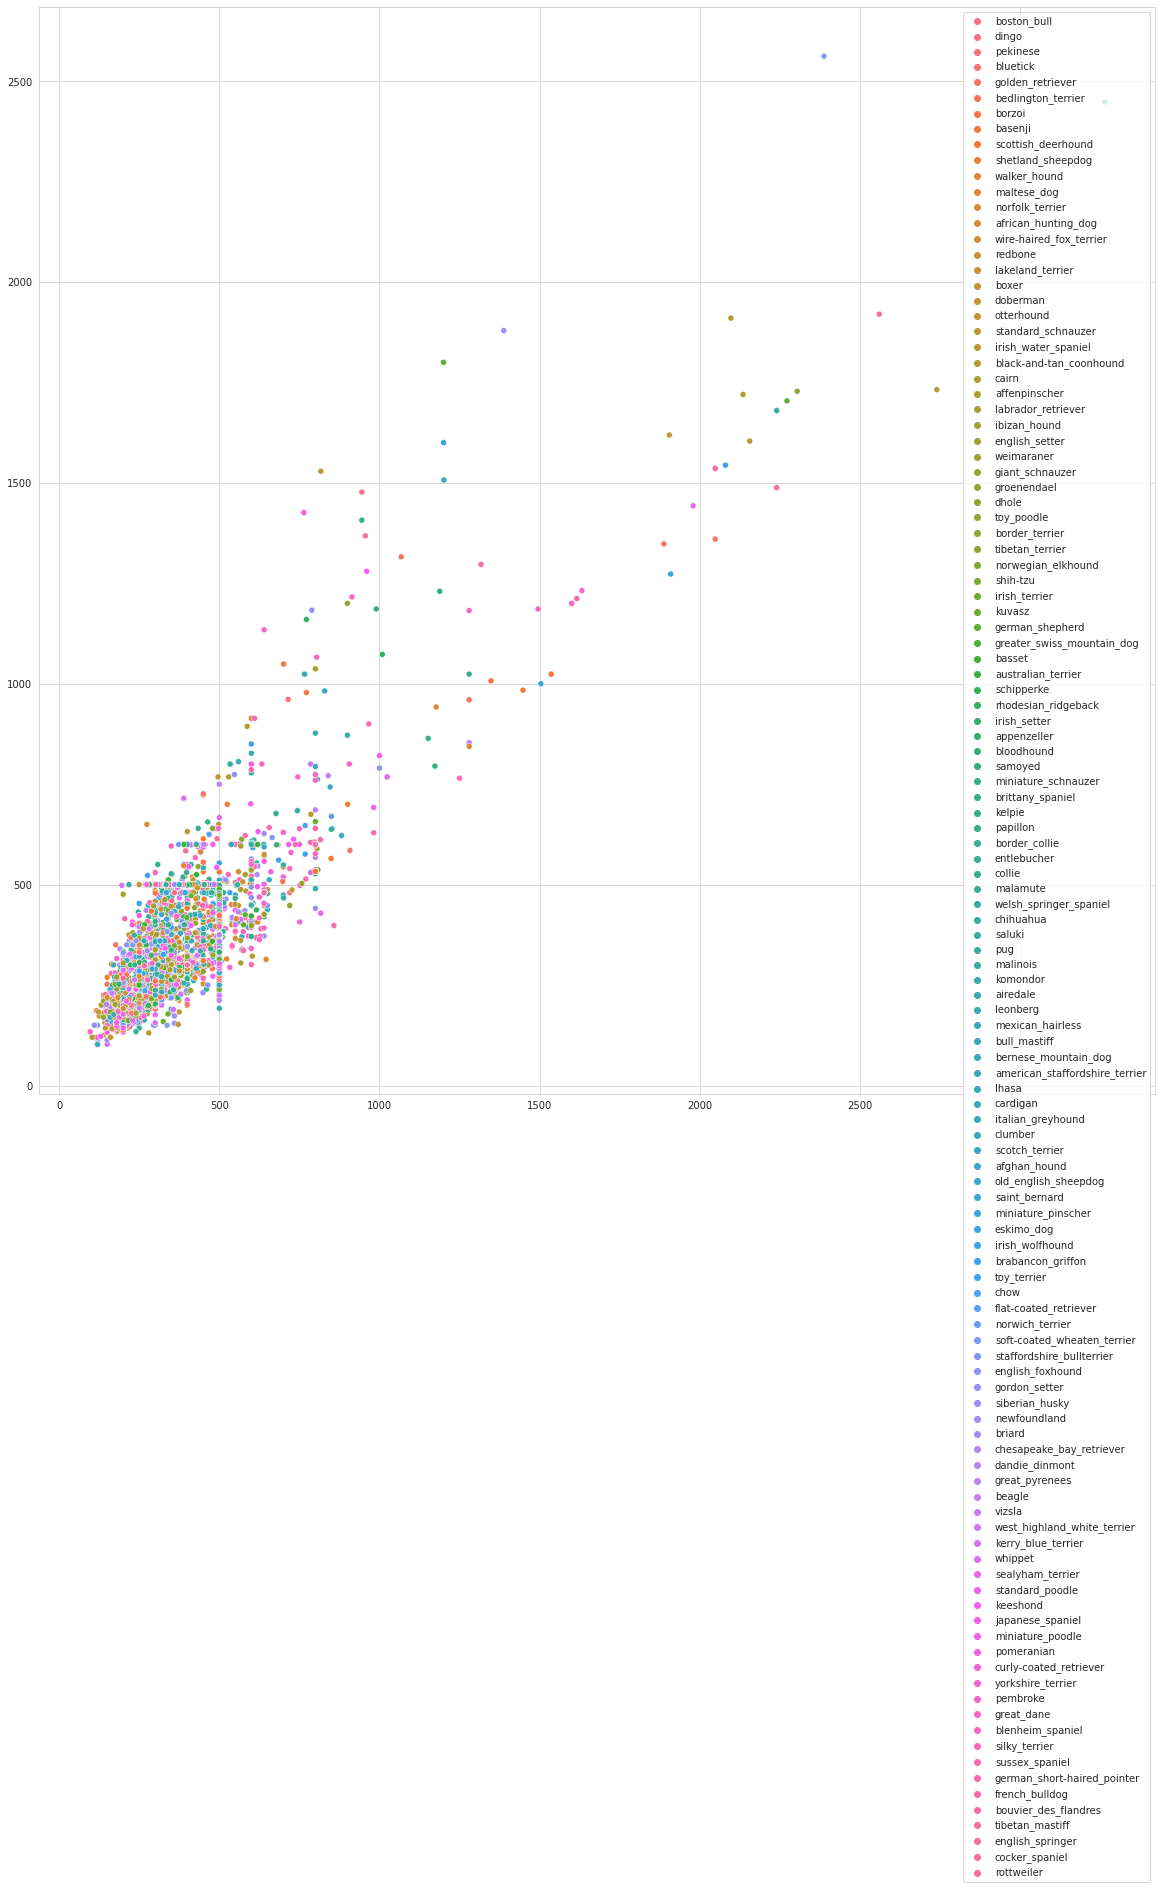

In [ ]:
plt.close()
plt.rcParams["figure.figsize"]=20,20

sns.set_style("whitegrid");
sp = sns.scatterplot(x = train_image_widths, y = train_image_heights, hue=train_files['breed'].values);
plt.show()

1. The above plot shows the relationship between image width and height of every train image.
2. It is evident that most images' lie within 500 pixels.
3. Height and width of the images alone aren't useful for determining the breed.

### Check for duplicates and missing values

In [ ]:
## Analyzing if images have more than one labels
labels_temp_dataframe = pd.DataFrame({'labels': train_files['id'].values})

print(labels_temp_dataframe.value_counts().head(5))
print(labels_temp_dataframe.value_counts().tail(5))
print(labels_temp_dataframe.value_counts().shape)

labels                          
fff43b07992508bc822f33d8ffd902ae    1
549bd24432ca6245f78e5ce709b8a3f2    1
54e86ccdccd89c2b15d712c61b9460a9    1
54e13fffdce2fc4807122c9b8861bf94    1
54d4876e394145a19762cbe38b44b3d4    1
dtype: int64
labels                          
ab193bb06012552321a1abb5ef2556e7    1
ab1715c4f68734a7fecb8901e9baf72a    1
ab16b0a2feea44546a293be0cf233261    1
ab15179d96c2fbc0c16c46683f92f001    1
000bec180eb18c7604dcecc8fe0dba07    1
dtype: int64
(10222,)


In [ ]:
 import os

 files_in_train_folder = os.listdir('train/')
 print("There are {0} files in train folder".format(len(files_in_train_folder)))

There are 10222 files in train folder


In [ ]:
print(train_files['id'].isna().any())
print(train_files['breed'].isna().any())

False
False


* There are 10222 images in the train folder. And there are same number of image IDs in the labels.csv file
* No image ID appears more than once in the csv file - which means, there are no duplicates or dual labels
* There are no missing values in labels.csv file
* Now we know that, even for images with more than one dog in the picture, there is only one corresponding label


### Image Analysis with PCA

In [ ]:
import random
from PIL import Image

random_train_paths = random.sample(set(train_files['path'].values), 10)
for filepath in random_train_paths:
  im = Image.open(filepath)
  display(im)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tqdm import tqdm
WIDTH = 100
HEIGHT = 100
flattened_images = []
for filepath in tqdm(train_files['path'].values):
  #reading path
  image_string = tf.io.read_file(filepath)
  #decoding image
  image = tf.image.decode_jpeg(image_string, channels=3)
  # This will convert to float values in [0, 1]
  image = tf.image.convert_image_dtype(image, tf.float32)
  #resize the image
  image = tf.image.resize(image, [WIDTH, HEIGHT])
  #flatten the pixels
  flattened_image = tf.reshape(image, [-1])
  flattened_images.append(flattened_image)





100%|██████████| 10222/10222 [00:49<00:00, 206.84it/s]


We are converting three dimensional pixels of an image into single row for giving it to PCA. 

In [ ]:
flattened_images = tf.convert_to_tensor(flattened_images)
print(flattened_images.shape)

(10222, 30000)


In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
pca_reduced_images = pca.fit_transform(flattened_images)

print(pca_reduced_images.shape)

(10222, 2)


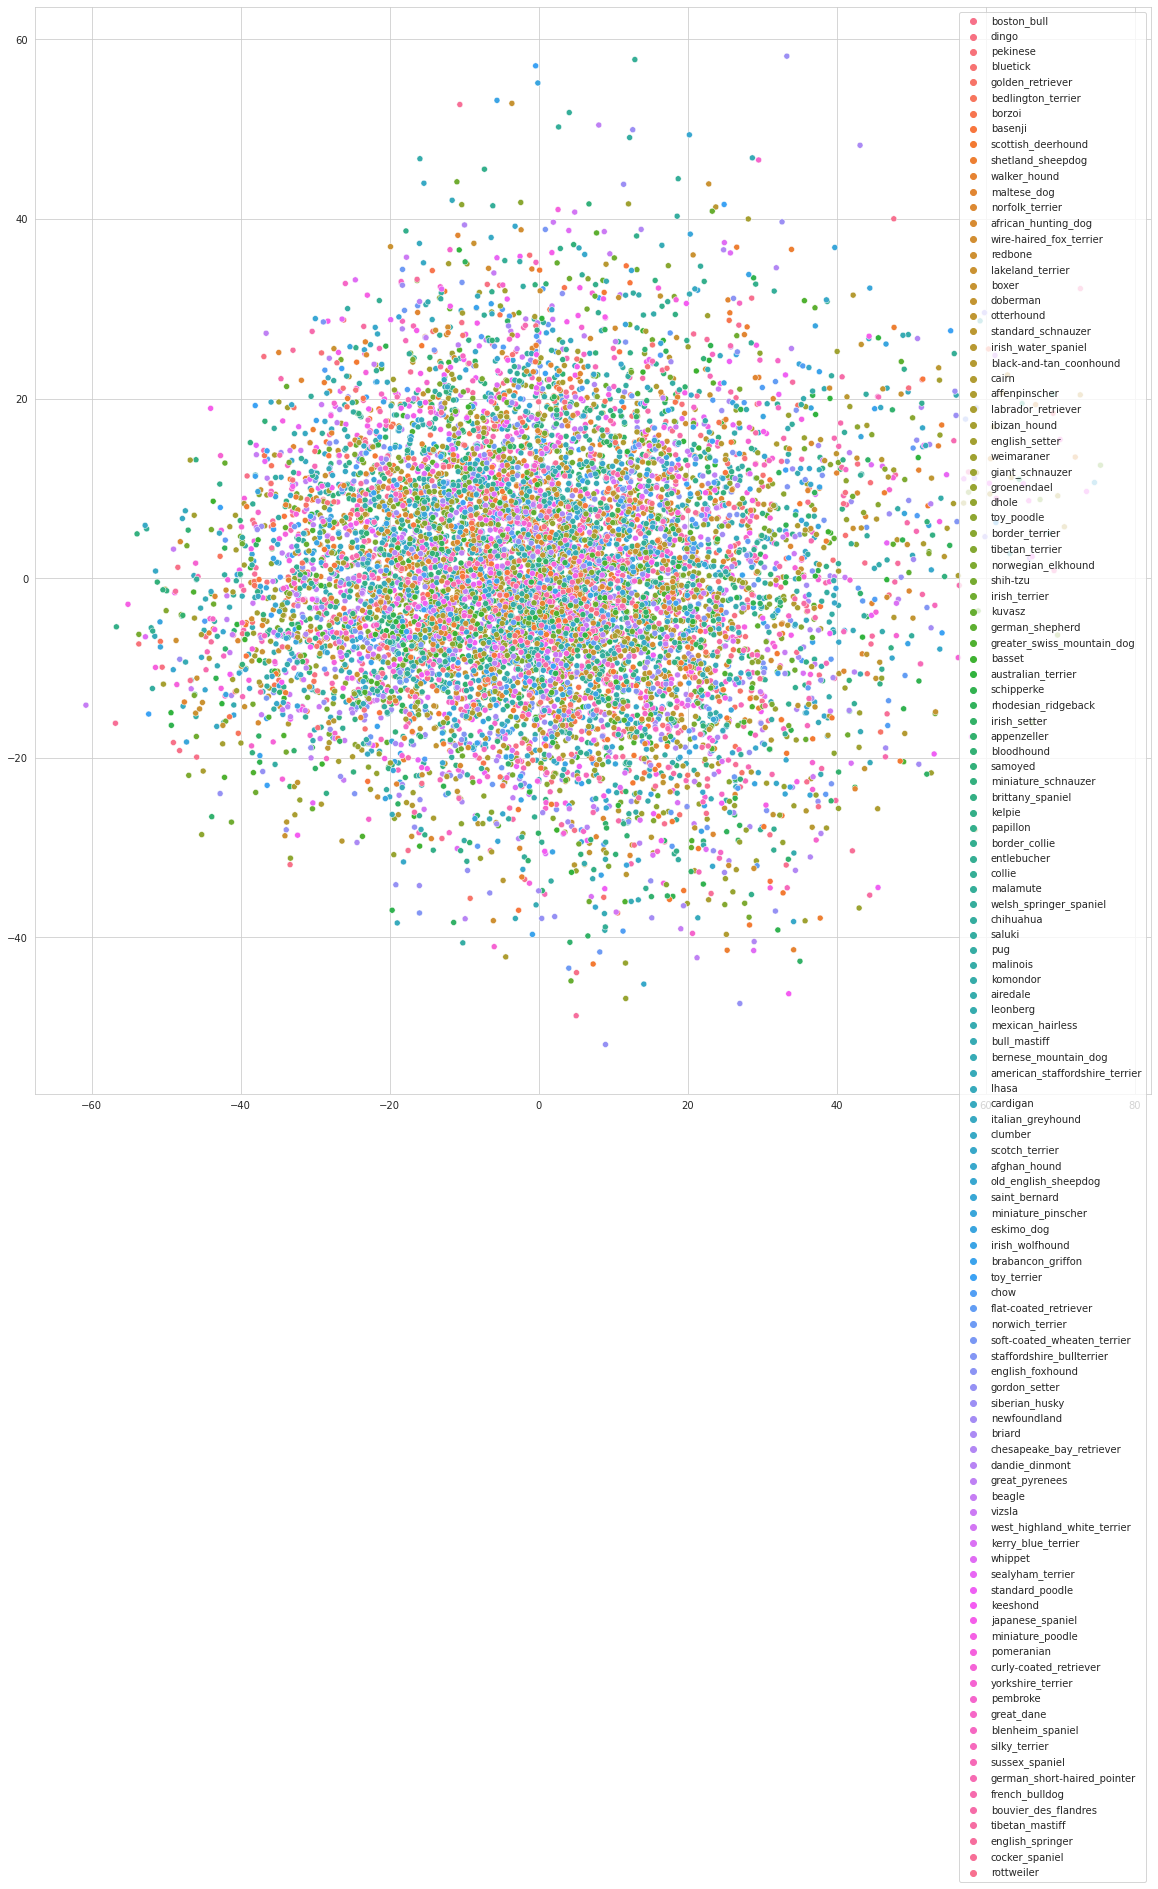

In [ ]:
plt.close()
plt.rcParams["figure.figsize"]=20,20

sns.set_style("whitegrid");
sp = sns.scatterplot(x = pca_reduced_images[:,0], y = pca_reduced_images[:,1], hue=train_files['breed'].values);
plt.show()

* Converted every image into flattened pixel array of 30000(100 X 100 X 3) features
* This vector was then sent through PCA to obtain 2 dimensions
* Scatterplot of these 2 dimensions does not reveal any significant clustering among breeds

## Splitting into Train and Test datasets

In [ ]:
from sklearn.model_selection import train_test_split
train_paths, test_paths, train_labels, test_labels = train_test_split(train_files['path'].values, train_files['breed'].values, test_size=0.2, stratify=train_files['breed'].values, random_state = 1)



In [ ]:
import pickle

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_labels)
train_encoded_labels = le.transform(train_labels)
test_encoded_labels = le.transform(test_labels)

# Dump the file
pickle.dump(le, open("Label_Encoder.pkl", "wb"))


In [ ]:
print(train_labels)
print(train_encoded_labels)

['toy_poodle' 'flat-coated_retriever' 'groenendael' ... 'english_springer'
 'irish_wolfhound' 'standard_schnauzer']
[110  44  54 ...  41  59 106]


## Modeling

### Data generator

In [ ]:
UNIQUE_CLASSES = 120
HEIGHT = 224
WIDTH = 224
def tfdata_generator(images, labels, is_training, batch_size=32):
  '''Construct a data generator using tf.Dataset'''
  def parse_function(filename, label):
    #reading path
    image_string = tf.io.read_file(filename)
    #decoding image
    image = tf.image.decode_jpeg(image_string, channels=3)
    # image = tfio.experimental.image.decode_tiff(image_string)
    # This will convert to float values in [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    #resize the image
    image = tf.image.resize(image, [WIDTH, HEIGHT])
    #one hot coding for label
    y = tf.one_hot(tf.cast(label, tf.uint8), UNIQUE_CLASSES)
    return image, y

  ##creating a dataset from tensorslices
  dataset = tf.data.Dataset.from_tensor_slices((images, labels))
  if is_training:
    dataset = dataset.shuffle(len(images)) # depends on sample size
  # Transform and batch data at the same time
  dataset = dataset.apply(tf.data.experimental.map_and_batch(parse_function, batch_size, num_parallel_batches=4, drop_remainder=True if is_training else False))
  #repeat the dataset indefinitely
  if is_training:
    dataset = dataset.repeat()
  #prefetch the data into CPU/GPU
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

In [ ]:
#creating a generator
tf_train_image_generator = tfdata_generator(train_paths, train_encoded_labels, is_training=True, batch_size=32)
tf_test_image_generator = tfdata_generator(test_paths, test_encoded_labels, is_training=False, batch_size=32)

Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.


### Baseline model with VGG

In [ ]:
import os
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graphsize will increses.
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)
#Input layer
input_layer = Input(shape=(WIDTH,HEIGHT,3),name='Input_Layer')
vgg = VGG16(include_top=False, input_shape=(WIDTH,HEIGHT,3), input_tensor=input_layer, weights="imagenet")
# Reference - https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
for layer in vgg.layers:
  layer.trainable = False
#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(vgg.output)
#output layer
Out = Dense(units=UNIQUE_CLASSES,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3), name='Output')(flatten)
#Creating a model
model = Model(inputs=input_layer,outputs=Out)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit_generator(tf_train_image_generator,steps_per_epoch=300, epochs=5, callbacks = None, validation_data = tf_test_image_generator, validation_steps=100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
300/300 [==============================] - 97s 322ms/step - loss: 0.4229 - accuracy: 0.9695 - val_loss: 33.5923 - val_accuracy: 0.2083
Epoch 2/5
300/300 [==============================] - 96s 320ms/step - loss: 0.1060 - accuracy: 0.9893 - val_loss: 33.1749 - val_accuracy: 0.2024
Epoch 3/5
300/300 [==============================] - 96s 320ms/step - loss: 0.0482 - accuracy: 0.9950 - val_loss: 33.0113 - val_accuracy: 0.2105
Epoch 4/5
300/300 [==============================] - 96s 320ms/step - loss: 0.0714 - accuracy: 0.9914 - val_loss: 33.1985 - val_accuracy: 0.2158
Epoch 5/5
300/300 [==============================] - 96s 320ms/step - loss: 0.0577 - accuracy: 0.9945 - val_loss: 32.7510 - val_accuracy: 0.2133


### VGG model

In [ ]:
# import os
# from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications.vgg16 import VGG16
# import random as rn
# os.environ['PYTHONHASHSEED'] = '0'
# ##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
# ## Have to clear the session. If you are not clearing, Graph will create again and again and graphsize will increses.
# ## Varibles will also set to some value from before session
# tf.keras.backend.clear_session()
# ## Set the random seed values to regenerate the model.
# np.random.seed(0)
# rn.seed(0)
# #Input layer
# input_layer = Input(shape=(WIDTH,HEIGHT,3),name='Input_Layer')
# vgg = VGG16(include_top=False, input_shape=(WIDTH,HEIGHT,3), input_tensor=input_layer, weights="imagenet")
# # Reference - https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
# for layer in vgg.layers:
#   layer.trainable = False
# #Conv Layer
# Conv1 = Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',data_format='channels_last', activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(vgg.layers[-1].output)
# #MaxPool Layer
# Pool1 = MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(Conv1)
# #Flatten
# flatten = Flatten(data_format='channels_last',name='Flatten')(Pool1)
# #FC layer
# FC1 = Dense(units=4096,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32), name='FC1')(flatten)
# #FC layer
# FC2 = Dense(units=1000,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33), name='FC2')(FC1)
# #output layer
# Out = Dense(units=UNIQUE_CLASSES,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3), name='Output')(FC2)
# #Creating a model
# model = Model(inputs=input_layer,outputs=Out)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
import os
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graphsize will increses.
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)
#Input layer
input_layer = Input(shape=(WIDTH,HEIGHT,3),name='Input_Layer')
vgg = VGG16(include_top=False, input_shape=(WIDTH,HEIGHT,3), input_tensor=input_layer, weights="imagenet")
# Reference - https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
for layer in vgg.layers:
  layer.trainable = False
#Flatten
dropout1 = Dropout(0.7)(vgg.output)
flatten = Flatten(data_format='channels_last',name='Flatten')(dropout1)
dropout2 = Dropout(0.5)(flatten)
#output layer
Out = Dense(units=UNIQUE_CLASSES,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3), name='Output')(dropout2)
#Creating a model
model = Model(inputs=input_layer,outputs=Out)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

In [ ]:
import datetime
log_dir1="logs/vgg1_without_img_aug/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir1,histogram_freq=1, write_graph=True,write_grads=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
model.fit_generator(tf_train_image_generator,steps_per_epoch=300,epochs=10, callbacks = [tensorboard_callback, checkpoint], validation_data = tf_test_image_generator, validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 7.9130 - accuracy: 0.0487
Epoch 00001: val_accuracy improved from -inf to 0.13750, saving model to model_save/weights-01-0.1375.hdf5
300/300 [==============================] - 98s 261ms/step - loss: 7.9130 - accuracy: 0.0487 - val_loss: 4.5894 - val_accuracy: 0.1375
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 6.1818 - accuracy: 0.1565
Epoch 00002: val_accuracy improved from 0.13750 to 0.15000, saving model to model_save/weights-02-0.1500.hdf5
300/300 [==============================] - 84s 279ms/step - loss: 6.1818 - accuracy: 0.1565 - val_loss: 4.6111 - val_accuracy: 0.1500
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 5.3549 - accuracy: 0.2369
Epoch 00003: val_accuracy improved from 0.15000 to 0.15625, saving model to model_save/weights-03-0.1562.hdf5
300/300 [==============================] - 91s 303ms/step - loss: 5.3549 - accuracy: 0.2369 - val_loss: 5.0752 - val_

In [ ]:
%load_ext tensorboard
%tensorboard --logdir  {log_dir1}


### Inception model

In [ ]:
import os
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graphsize will increses.
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)
#Input layer
input_layer = Input(shape=(WIDTH,HEIGHT,3),name='Input_Layer')
inc = InceptionV3(include_top=False, input_shape=(WIDTH,HEIGHT,3), input_tensor = input_layer, weights="imagenet")
# Reference - https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
for layer in inc.layers:
  layer.trainable = False
#GlobalAveragePooling2D
gap = GlobalAveragePooling2D()(inc.output)
#Fully connected layer
dense = Dense(512, activation='relu')(gap)
dropout = Dropout(0.5)(dense)
#output layer
Out = Dense(units=UNIQUE_CLASSES,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3), name='Output')(dropout)
#Creating a model
model = Model(inputs=input_layer,outputs=Out)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['Input_Layer[0][0]']            
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

In [ ]:
import datetime
log_dir1="logs/inception_without_img_aug/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir1,histogram_freq=1, write_graph=True,write_grads=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
model.fit_generator(tf_train_image_generator,steps_per_epoch=300,epochs=10, callbacks = [tensorboard_callback, checkpoint], validation_data = tf_test_image_generator, validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 0.4485 - accuracy: 0.8622
Epoch 00001: val_accuracy improved from -inf to 0.80000, saving model to model_save/weights-01-0.8000.hdf5
300/300 [==============================] - 93s 292ms/step - loss: 0.4485 - accuracy: 0.8622 - val_loss: 0.7794 - val_accuracy: 0.8000
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 0.3826 - accuracy: 0.8749
Epoch 00002: val_accuracy did not improve from 0.80000
300/300 [==============================] - 80s 267ms/step - loss: 0.3826 - accuracy: 0.8749 - val_loss: 0.8110 - val_accuracy: 0.7875
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 0.4004 - accuracy: 0.8691
Epoch 00003: val_accuracy did not improve from 0.80000
300/300 [==============================] - 81s 269ms/step - loss: 0.4004 - accuracy: 0.8691 - val_loss: 0.9174 - val_accuracy: 0.7375
Epoch 4/10
300/300 [==============================] - ETA: 0s - loss: 0.3737 - accuracy: 0.87

In [ ]:
%load_ext tensorboard
%tensorboard --logdir  {log_dir1}


### Inception model with overfitting fix

In [ ]:
import os
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graphsize will increses.
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)
#Input layer
input_layer = Input(shape=(WIDTH,HEIGHT,3),name='Input_Layer')
inc = InceptionV3(include_top=False, input_shape=(WIDTH,HEIGHT,3), input_tensor = input_layer, weights="imagenet")
# Reference - https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
for layer in inc.layers:
  layer.trainable = False
#GlobalAveragePooling2D
gap = GlobalAveragePooling2D()(inc.output)
#Fully connected layer
dense = Dense(256, activation='relu')(gap)
dropout = Dropout(0.6)(dense)
#output layer
Out = Dense(units=UNIQUE_CLASSES,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3), name='Output')(dropout)
#Creating a model
model = Model(inputs=input_layer,outputs=Out)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['Input_Layer[0][0]']            
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
history = model.fit_generator(tf_train_image_generator,steps_per_epoch=300,epochs=10, callbacks = [earlystop, checkpoint], validation_data = tf_test_image_generator, validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 2.4130 - accuracy: 0.4514
Epoch 00001: val_accuracy improved from -inf to 0.75625, saving model to model_save/weights-01-0.7563.hdf5
300/300 [==============================] - 53s 114ms/step - loss: 2.4130 - accuracy: 0.4514 - val_loss: 0.8895 - val_accuracy: 0.7563
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 1.2624 - accuracy: 0.6653
Epoch 00002: val_accuracy improved from 0.75625 to 0.76875, saving model to model_save/weights-02-0.7688.hdf5
300/300 [==============================] - 39s 130ms/step - loss: 1.2624 - accuracy: 0.6653 - val_loss: 0.8272 - val_accuracy: 0.7688
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 1.0410 - accuracy: 0.7132
Epoch 00003: val_accuracy improved from 0.76875 to 0.80000, saving model to model_save/weights-03-0.8000.hdf5
300/300 [==============================] - 39s 130ms/step - loss: 1.0410 - accuracy: 0.7132 - val_loss: 0.7758 - val_

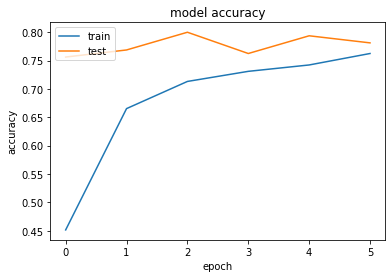

In [ ]:
plt.close()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

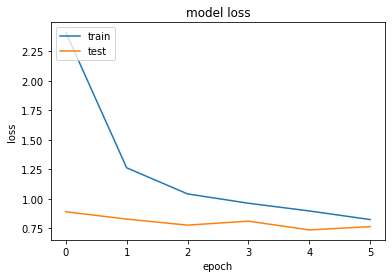

In [ ]:
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Inception Resnet model

In [ ]:
import os
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionResNetV2
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graphsize will increses.
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)
#Input layer
input_layer = Input(shape=(WIDTH,HEIGHT,3),name='Input_Layer')
irn = InceptionResNetV2(include_top=False, input_shape=(WIDTH,HEIGHT,3), input_tensor = input_layer, weights="imagenet")
# Reference - https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
for layer in irn.layers:
  layer.trainable = False
#GlobalAveragePooling2D
gap = GlobalAveragePooling2D()(irn.output)
#Fully connected layer
dense = Dense(512, activation='relu')(gap)
dropout = Dropout(0.5)(dense)
#output layer
Out = Dense(units=UNIQUE_CLASSES,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3), name='Output')(dropout)
#Creating a model
model = Model(inputs=input_layer,outputs=Out)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['Input_Layer[0][0]']            
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
history = model.fit_generator(tf_train_image_generator,steps_per_epoch=300,epochs=10, callbacks = [checkpoint], validation_data = tf_test_image_generator, validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 1.9456 - accuracy: 0.5805
Epoch 00001: val_accuracy improved from -inf to 0.77500, saving model to model_save/weights-01-0.7750.hdf5
300/300 [==============================] - 148s 412ms/step - loss: 1.9456 - accuracy: 0.5805 - val_loss: 0.9857 - val_accuracy: 0.7750
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 1.4847 - accuracy: 0.6543
Epoch 00002: val_accuracy improved from 0.77500 to 0.78125, saving model to model_save/weights-02-0.7812.hdf5
300/300 [==============================] - 122s 407ms/step - loss: 1.4847 - accuracy: 0.6543 - val_loss: 0.9724 - val_accuracy: 0.7812
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 1.4676 - accuracy: 0.6566
Epoch 00003: val_accuracy did not improve from 0.78125
300/300 [==============================] - 118s 394ms/step - loss: 1.4676 - accuracy: 0.6566 - val_loss: 1.1849 - val_accuracy: 0.7437
Epoch 4/10
300/300 [===============

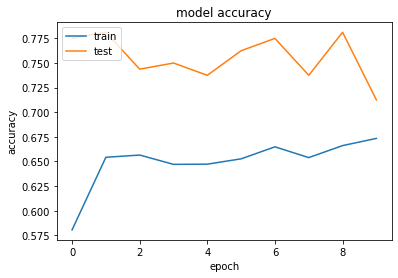

In [ ]:
plt.close()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

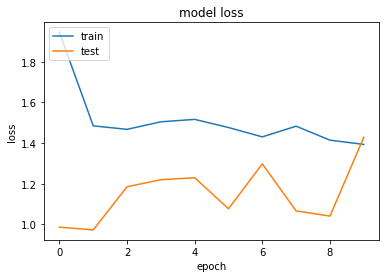

In [ ]:
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Inception Resnet model with Conv layers

In [ ]:
import os
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionResNetV2
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graphsize will increses.
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)
#Input layer
input_layer = Input(shape=(WIDTH,HEIGHT,3),name='Input_Layer')
irn = InceptionResNetV2(include_top=False, input_shape=(WIDTH,HEIGHT,3), input_tensor = input_layer, weights="imagenet")
# Reference - https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
for layer in irn.layers:
  layer.trainable = False
# Conv Layer
conv1 = Conv2D(filters=1096,kernel_size=(5,5),strides=(1,1),padding='valid', activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(irn.output)
#GlobalAveragePooling2D
gap = GlobalAveragePooling2D()(conv1)
#Fully connected layer
dense = Dense(512, activation='relu')(gap)
dropout = Dropout(0.4)(dense)
#output layer
Out = Dense(units=UNIQUE_CLASSES,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3), name='Output')(dropout)
#Creating a model
model = Model(inputs=input_layer,outputs=Out)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['Input_Layer[0][0]']            
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=4, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
history = model.fit_generator(tf_train_image_generator,steps_per_epoch=300,epochs=20, callbacks = [checkpoint], validation_data = tf_test_image_generator, validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
300/300 [==============================] - ETA: 0s - loss: 2.6809 - accuracy: 0.5573
Epoch 00001: val_accuracy improved from -inf to 0.73125, saving model to model_save/weights-01-0.7312.hdf5
300/300 [==============================] - 180s 494ms/step - loss: 2.6809 - accuracy: 0.5573 - val_loss: 1.1194 - val_accuracy: 0.7312
Epoch 2/20
300/300 [==============================] - ETA: 0s - loss: 1.1843 - accuracy: 0.7370
Epoch 00002: val_accuracy improved from 0.73125 to 0.74375, saving model to model_save/weights-02-0.7437.hdf5
300/300 [==============================] - 142s 472ms/step - loss: 1.1843 - accuracy: 0.7370 - val_loss: 1.5530 - val_accuracy: 0.7437
Epoch 3/20
300/300 [==============================] - ETA: 0s - loss: 0.9844 - accuracy: 0.7709
Epoch 00003: val_accuracy did not improve from 0.74375
300/300 [==============================] - 138s 460ms/step - loss: 0.9844 - accuracy: 0.7709 - val_loss: 1.3344 - val_accuracy: 0.7375
Epoch 4/20
300/300 [===============

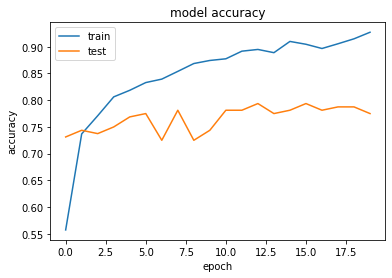

In [ ]:
plt.close()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

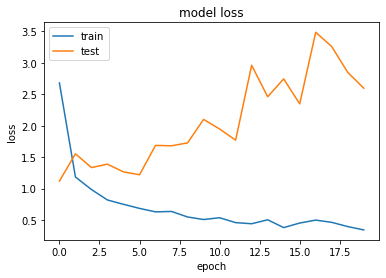

In [ ]:
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Data generator with Image Augmentation

In [ ]:
from tqdm import tqdm
UNIQUE_CLASSES = 120
HEIGHT = 150
WIDTH = 150
X_train_tensor = []
for file_image in tqdm(train_paths):
    #reading path
    image_string = tf.io.read_file(file_image)
    #decoding image
    image = tf.image.decode_jpeg(image_string, channels=3)
    # image = tfio.experimental.image.decode_tiff(image_string)
    # This will convert to float values in [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    #resize the image
    image = tf.image.resize(image, [WIDTH, HEIGHT])
    X_train_tensor.append(image)

X_train_tensor = tf.convert_to_tensor(X_train_tensor)
print(X_train_tensor.shape)

X_test_tensor = []
for file_image in tqdm(test_paths):
    #reading path
    image_string = tf.io.read_file(file_image)
    #decoding image
    image = tf.image.decode_jpeg(image_string, channels=3)
    # image = tfio.experimental.image.decode_tiff(image_string)
    # This will convert to float values in [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    #resize the image
    image = tf.image.resize(image, [WIDTH, HEIGHT])
    X_test_tensor.append(image)

X_test_tensor = tf.convert_to_tensor(X_test_tensor)
print(X_test_tensor.shape)

100%|██████████| 8177/8177 [00:30<00:00, 264.51it/s]


(8177, 150, 150, 3)


100%|██████████| 2045/2045 [00:06<00:00, 326.87it/s]

(2045, 150, 150, 3)


In [ ]:
y_train_one_hot_tensor = []
for label in tqdm(train_encoded_labels):
  y = tf.one_hot(tf.cast(label, tf.uint8), UNIQUE_CLASSES)
  y_train_one_hot_tensor.append(y)

y_train_one_hot_tensor = tf.convert_to_tensor(y_train_one_hot_tensor)
print(y_train_one_hot_tensor.shape)

y_test_one_hot_tensor = []
for label in tqdm(test_encoded_labels):
  y = tf.one_hot(tf.cast(label, tf.uint8), UNIQUE_CLASSES)
  y_test_one_hot_tensor.append(y)

y_test_one_hot_tensor = tf.convert_to_tensor(y_test_one_hot_tensor)
print(y_test_one_hot_tensor.shape)

100%|██████████| 8177/8177 [00:04<00:00, 1868.40it/s]


(8177, 120)


100%|██████████| 2045/2045 [00:01<00:00, 1850.30it/s]

(2045, 120)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 32

augmented_img_generator = ImageDataGenerator(height_shift_range = 0.1, horizontal_flip = True, rotation_range = 15, shear_range = 15, width_shift_range = 0.1, zoom_range = 0.2)

augmented_img_generator.fit(X_train_tensor)

img_train = augmented_img_generator.flow(X_train_tensor, y_train_one_hot_tensor, batch_size=BATCH_SIZE)

### VGG model with Image Augmentation

In [ ]:
import os
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graphsize will increses.
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)
#Input layer
input_layer = Input(shape=(WIDTH,HEIGHT,3),name='Input_Layer')
vgg = VGG16(include_top=False, input_shape=(WIDTH,HEIGHT,3), input_tensor=input_layer, weights="imagenet")
# Reference - https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
for layer in vgg.layers:
  layer.trainable = False
#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(vgg.output)
dropout = Dropout(0.5)(flatten)
#output layer
Out = Dense(units=UNIQUE_CLASSES,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3), name='Output')(dropout)
#Creating a model
model = Model(inputs=input_layer,outputs=Out)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
steps = int(X_train_tensor.shape[0] / BATCH_SIZE)
history = model.fit_generator(img_train,steps_per_epoch=steps,epochs=10, callbacks = [checkpoint], validation_data = (X_test_tensor,y_test_one_hot_tensor), validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
255/255 [==============================] - ETA: 0s - loss: 5.0145 - accuracy: 0.0538
Epoch 00001: val_accuracy improved from -inf to 0.13252, saving model to model_save/weights-01-0.1325.hdf5
255/255 [==============================] - 132s 460ms/step - loss: 5.0145 - accuracy: 0.0538 - val_loss: 3.9897 - val_accuracy: 0.1325
Epoch 2/10
255/255 [==============================] - ETA: 0s - loss: 3.9966 - accuracy: 0.1536
Epoch 00002: val_accuracy improved from 0.13252 to 0.16968, saving model to model_save/weights-02-0.1697.hdf5
255/255 [==============================] - 63s 245ms/step - loss: 3.9966 - accuracy: 0.1536 - val_loss: 3.8543 - val_accuracy: 0.1697
Epoch 3/10
255/255 [==============================] - ETA: 0s - loss: 3.6279 - accuracy: 0.2031
Epoch 00003: val_accuracy improved from 0.16968 to 0.17702, saving model to model_save/weights-03-0.1770.hdf5
255/255 [==============================] - 65s 254ms/step - loss: 3.6279 - accuracy: 0.2031 - val_loss: 3.7123 - val

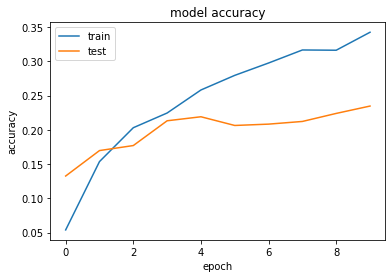

In [ ]:
plt.close()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

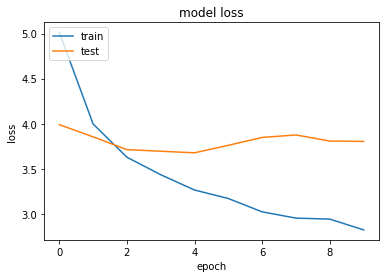

In [ ]:
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Inception model with Image Augmentation

In [ ]:
import os
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graphsize will increses.
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)
#Input layer
input_layer = Input(shape=(WIDTH,HEIGHT,3),name='Input_Layer')
inc = InceptionV3(include_top=False, input_shape=(WIDTH,HEIGHT,3), input_tensor = input_layer, weights="imagenet")
# Reference - https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
for layer in inc.layers:
  layer.trainable = False
#GlobalAveragePooling2D
gap = GlobalAveragePooling2D()(inc.output)
#Fully connected layer
dense = Dense(512, activation='relu')(gap)
dropout = Dropout(0.5)(dense)
#output layer
Out = Dense(units=UNIQUE_CLASSES,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3), name='Output')(dropout)
#Creating a model
model = Model(inputs=input_layer,outputs=Out)

87924736/87910968 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['Input_Layer[0][0]']            
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
steps = int(X_train_tensor.shape[0] / BATCH_SIZE)
history = model.fit_generator(img_train,steps_per_epoch=steps,epochs=10, callbacks = [checkpoint], validation_data = (X_test_tensor,y_test_one_hot_tensor), validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
255/255 [==============================] - ETA: 0s - loss: 3.7439 - accuracy: 0.1974
Epoch 00001: val_accuracy improved from -inf to 0.51247, saving model to model_save/weights-01-0.5125.hdf5
255/255 [==============================] - 83s 300ms/step - loss: 3.7439 - accuracy: 0.1974 - val_loss: 1.9658 - val_accuracy: 0.5125
Epoch 2/10
255/255 [==============================] - ETA: 0s - loss: 2.6853 - accuracy: 0.3461
Epoch 00002: val_accuracy improved from 0.51247 to 0.54817, saving model to model_save/weights-02-0.5482.hdf5
255/255 [==============================] - 59s 230ms/step - loss: 2.6853 - accuracy: 0.3461 - val_loss: 1.6975 - val_accuracy: 0.5482
Epoch 3/10
255/255 [==============================] - ETA: 0s - loss: 2.4726 - accuracy: 0.3901
Epoch 00003: val_accuracy improved from 0.54817 to 0.55892, saving model to model_save/weights-03-0.5589.hdf5
255/255 [==============================] - 58s 227ms/step - loss: 2.4726 - accuracy: 0.3901 - val_loss: 1.6218 - val_

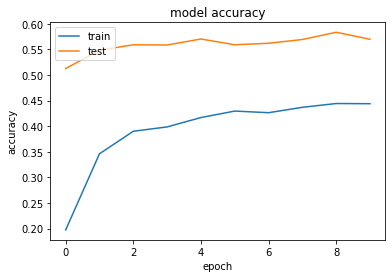

In [ ]:
plt.close()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

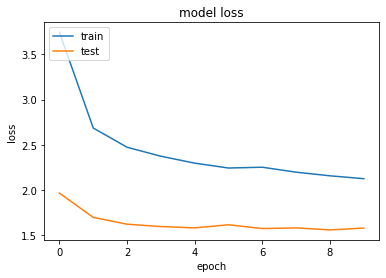

In [ ]:
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Inception Resnet model with Image Augmentation

In [ ]:
import os
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionResNetV2
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graphsize will increses.
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)
#Input layer
input_layer = Input(shape=(WIDTH,HEIGHT,3),name='Input_Layer')
irn = InceptionResNetV2(include_top=False, input_shape=(WIDTH,HEIGHT,3), input_tensor = input_layer, weights="imagenet")
# Reference - https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
for layer in irn.layers:
  layer.trainable = False
#GlobalAveragePooling2D
gap = GlobalAveragePooling2D()(irn.output)
#Fully connected layer
dense = Dense(512, activation='relu')(gap)
dropout = Dropout(0.4)(dense)
#output layer
Out = Dense(units=UNIQUE_CLASSES,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3), name='Output')(dropout)
#Creating a model
model = Model(inputs=input_layer,outputs=Out)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['Input_Layer[0][0]']            
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
steps = int(X_train_tensor.shape[0] / BATCH_SIZE)
history = model.fit_generator(img_train,steps_per_epoch=steps,epochs=10, callbacks = [checkpoint], validation_data = (X_test_tensor,y_test_one_hot_tensor), validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
255/255 [==============================] - ETA: 0s - loss: 2.6748 - accuracy: 0.4228
Epoch 00001: val_accuracy improved from -inf to 0.63716, saving model to model_save/weights-01-0.6372.hdf5
255/255 [==============================] - 65s 218ms/step - loss: 2.6748 - accuracy: 0.4228 - val_loss: 1.4023 - val_accuracy: 0.6372
Epoch 2/10
255/255 [==============================] - ETA: 0s - loss: 1.9776 - accuracy: 0.5186
Epoch 00002: val_accuracy did not improve from 0.63716
255/255 [==============================] - 53s 209ms/step - loss: 1.9776 - accuracy: 0.5186 - val_loss: 1.4593 - val_accuracy: 0.6269
Epoch 3/10
255/255 [==============================] - ETA: 0s - loss: 1.8707 - accuracy: 0.5362
Epoch 00003: val_accuracy improved from 0.63716 to 0.64743, saving model to model_save/weights-03-0.6474.hdf5
255/255 [==============================] - 53s 206ms/step - loss: 1.8707 - accuracy: 0.5362 - val_loss: 1.3832 - val_accuracy: 0.6474
Epoch 4/10
255/255 [==================

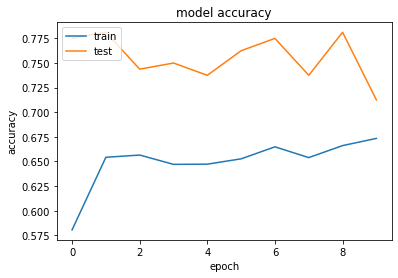

In [ ]:
plt.close()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

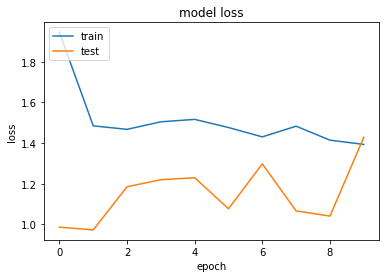

In [ ]:
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Inception Resnet model with CNN Layers with Image Augmentation

In [ ]:
import os
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionResNetV2
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graphsize will increses.
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)
#Input layer
input_layer = Input(shape=(WIDTH,HEIGHT,3),name='Input_Layer')
irn = InceptionResNetV2(include_top=False, input_shape=(WIDTH,HEIGHT,3), input_tensor = input_layer, weights="imagenet")
# Reference - https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
for layer in irn.layers:
  layer.trainable = False
# Conv Layer
conv1 = Conv2D(filters=1096,kernel_size=(3,3),strides=(1,1),padding='valid', activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(irn.output)
#GlobalAveragePooling2D
gap = GlobalAveragePooling2D()(conv1)
#Fully connected layer
dense = Dense(512, activation='relu')(gap)
dropout = Dropout(0.4)(dense)
#output layer
Out = Dense(units=UNIQUE_CLASSES,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3), name='Output')(dropout)
#Creating a model
model = Model(inputs=input_layer,outputs=Out)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['Input_Layer[0][0]']            
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
steps = int(X_train_tensor.shape[0] / BATCH_SIZE)
history = model.fit_generator(img_train,steps_per_epoch=steps,epochs=10, callbacks = [earlystop, checkpoint], validation_data = (X_test_tensor,y_test_one_hot_tensor), validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
255/255 [==============================] - ETA: 0s - loss: 1.7023 - accuracy: 0.5611
Epoch 00001: val_accuracy did not improve from 0.64694
255/255 [==============================] - 58s 227ms/step - loss: 1.7023 - accuracy: 0.5611 - val_loss: 1.6309 - val_accuracy: 0.6450
Epoch 2/10
255/255 [==============================] - ETA: 0s - loss: 1.7178 - accuracy: 0.5703
Epoch 00002: val_accuracy improved from 0.64694 to 0.65330, saving model to model_save/weights-02-0.6533.hdf5
255/255 [==============================] - 56s 220ms/step - loss: 1.7178 - accuracy: 0.5703 - val_loss: 1.6482 - val_accuracy: 0.6533
Epoch 3/10
255/255 [==============================] - ETA: 0s - loss: 1.6975 - accuracy: 0.5702
Epoch 00003: val_accuracy did not improve from 0.65330
255/255 [==============================] - 54s 210ms/step - loss: 1.6975 - accuracy: 0.5702 - val_loss: 1.5297 - val_accuracy: 0.6411
Epoch 4/10
255/255 [==============================] - ETA: 0s - loss: 1.6544 - accuracy: 0

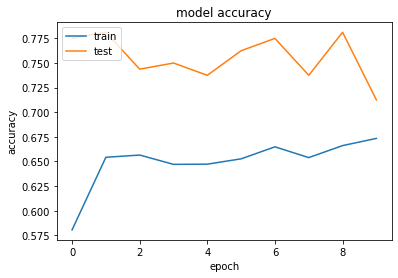

In [ ]:
plt.close()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

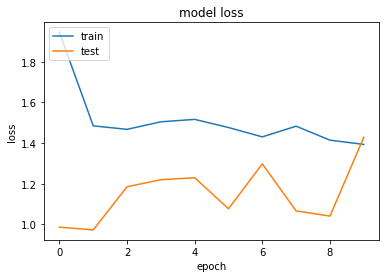

In [ ]:
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Summary

In [ ]:
from prettytable import PrettyTable 
summaryTable = PrettyTable(["DL Model", "Validation Accuracy (without Augmentation)", "Validation Accuracy (with Augmentation)"]) 
  
# Add rows 
summaryTable.add_row(["Neural Network with VGG", "0.225", "0.235"]) #
summaryTable.add_row(["Neural Network with Inception",  "0.807", "0.583"]) #
summaryTable.add_row(["Neural Network with Inception Resnet", "0.78", "0.647"]) #
summaryTable.add_row(["Neural Network with Inception Resnet with CNN layers", "0.79", "0.653"]) #

print(summaryTable)

+------------------------------------------------------+--------------------------------------------+-----------------------------------------+
|                       DL Model                       | Validation Accuracy (without Augmentation) | Validation Accuracy (with Augmentation) |
+------------------------------------------------------+--------------------------------------------+-----------------------------------------+
|               Neural Network with VGG                |                   0.225                    |                  0.235                  |
|            Neural Network with Inception             |                   0.807                    |                  0.583                  |
|         Neural Network with Inception Resnet         |                    0.78                    |                  0.647                  |
| Neural Network with Inception Resnet with CNN layers |                    0.79                    |                  0.653            

* VGG model was used as baseline. Baseline model was extremely overfitting
* Added drop-out layers to the baseline model to address overfitting. The model performed slightly better than baseline with and without augmentation
* Implemented Inception transfer learning. This model achieved a solid val_acc of .81 without image augmentation. The model did overfit a little. So increased drop-out rates and decreased fully_connected layer nodes. The resultant model was 80% accurate on both train and val data. This was not overfitting. This is the best model
* Implemented Inception Resnet model. This model achieved a healthy accuracy of 0.78 without image augmentation. The model did not overfit as weel
* Tried adding CNN layers and FNN to Inception Resnet model. The val_accuracy improved slightly to 0.79

**Overall - NN based on Inception did really well. We'll be using that as the final model**

## Post-training Quantization

In [ ]:
## Load the best model
!wget --header="Host: doc-0g-4k-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_mm5pe75pf4mhpbdikb2k80b74s62g311=08255761277798433337|1643789475000|73aes4jc4fd9qqgj5qc84qlgm36k4bt0" --header="Connection: keep-alive" "https://doc-0g-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/pcih1igi56ltd7ciuc6d5428u9vd308f/1643789550000/08255761277798433337/08255761277798433337/1fiiRvSiqn_6zBwSfX1MenklAR8adY3Fe?e=download&authuser=0" -c -O 'weights-03-0.8000.hdf5'

--2022-02-02 08:14:08--  https://doc-0g-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/pcih1igi56ltd7ciuc6d5428u9vd308f/1643789550000/08255761277798433337/08255761277798433337/1fiiRvSiqn_6zBwSfX1MenklAR8adY3Fe?e=download&authuser=0
Resolving doc-0g-4k-docs.googleusercontent.com (doc-0g-4k-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-0g-4k-docs.googleusercontent.com (doc-0g-4k-docs.googleusercontent.com)|74.125.23.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94770200 (90M) [application/octet-stream]
Saving to: ‘weights-03-0.8000.hdf5’

weights-03-0.8000.h 100%[===================>]  90.38M   121MB/s    in 0.8s    

2022-02-02 08:14:09 (121 MB/s) - ‘weights-03-0.8000.hdf5’ saved [94770200/94770200]



In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model('weights-03-0.8000.hdf5')

In [ ]:
#https://github.com/bhattbhavesh91/tflite-tutorials/blob/master/tflite-part-2.ipynb
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model_quant = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpatr3q8hq/assets


INFO:tensorflow:Assets written to: /tmp/tmpatr3q8hq/assets


In [ ]:
open('dog_breed_tflite_model', "wb").write(tflite_model_quant)

22779008

In [ ]:
import os
original_model_size = os.path.getsize('weights-03-0.8000.hdf5')
tflite_model_size = os.path.getsize('dog_breed_tflite_model')

print("Original model size:", original_model_size)
print("TFLite model size:", tflite_model_size)
size_reduced_by = (original_model_size - tflite_model_size)/original_model_size
print("Size reduced by:", size_reduced_by)

Original model size: 94770200
TFLite model size: 22779008
Size reduced by: 0.7596395491409746


In [ ]:
best_model.evaluate(tf_test_image_generator)

64/64 [==============================] - 22s 190ms/step - loss: 0.7475 - accuracy: 0.7829


[0.747520923614502, 0.7828850746154785]

In [ ]:
interpreter = tf.lite.Interpreter(model_path = 'dog_breed_tflite_model')
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [  1 120]
Output Type: <class 'numpy.float32'>


In [ ]:
interpreter.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
interpreter.resize_tensor_input(output_details[0]['index'], (32, 120))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 32 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [ 32 120]
Output Type: <class 'numpy.float32'>


In [ ]:
lite_predictions = []
lite_actuals = []
for batch in tf_test_image_generator:
    interpreter.set_tensor(input_details[0]['index'], batch[0])
    interpreter.invoke()
    tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
    lite_actuals = batch[1]
    lite_predictions = tflite_model_predictions
    break

print(lite_predictions.shape)
print(lite_actuals.shape)

(32, 120)
(32, 120)


In [ ]:
from sklearn.metrics import accuracy_score

lite_prediction_classes = np.argmax(lite_predictions, axis=1)
lite_actuals_classes = np.argmax(lite_actuals, axis=1)
acc = accuracy_score(lite_prediction_classes, lite_actuals_classes)
print("Accuracy of Lite model:", acc)

Accuracy of Lite model: 0.8125
